In [1]:
import os
# Only for first run after kernel restart
os.chdir('..')

In [3]:
from src.utils import *
from src.v2.config import *
import pandas as pd
import src.utils as utils
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label  
from PIL import Image
import cv2
import torch
from torch.utils import data
from src.v2.data import AirbusSegmentation


In [4]:


# def mask_overlay(image, mask, color=(0, 1, 0)):
#     """
#     Helper function to visualize mask on the top of the image
#     """
#     mask = np.dstack((mask, mask, mask)) * np.array(color)
#     weighted_sum = cv2.addWeighted(mask.astype(np.float64), 0.5, image.astype(np.float64), 0.5, 0.)
#     img = image.copy()
#     ind = mask[:, :, 1] > 0
#     img[ind] = weighted_sum[ind]
#     return img


# def imshow(img, mask=None, title=None):
#     """Imshow for Tensor."""
#     img = img / 255
#     if mask is not None:
#         fig = plt.figure(figsize=(6, 6))
#         plt.imshow(mask_overlay(img, mask))
#     else:
#         fig = plt.figure(figsize=(6, 6))
#         plt.imshow(img)
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.001)

    

# def imshows(img, mask=None, bound=None, title=None):
#     """Imshow for Tensor."""
#     img = img / 255
#     if mask is not None:
#         img = mask_overlay(img, mask, color=(1, 1, 0))
#         if bound is not None:
#             img = mask_overlay(img, bound, color=(0, 1, 0))
#         plt.imshow(img)
#     else:
#         plt.imshow(img)
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.001)
    
# def plotim(row):
#     im_id, pix = row
#     image = cv2.imread('data/train_v2/' + im_id)
#     imshow(image, utils.rle_decode(pix))

In [40]:
data = pd.read_csv("data/processed_v2.csv")

In [41]:
ships = data[data.ships != 0]

In [42]:
ds = AirbusSegmentation(ships[['ImageId', 'mask_nb', 'border']])

In [64]:
im, msk = ds[900]

In [73]:
torch.sum(msk.unsqueeze(0), dim=1, keepdim=True).shape

torch.Size([1, 1, 768, 768])

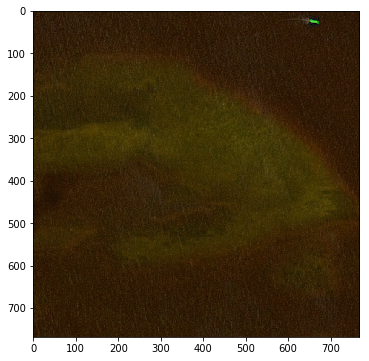

In [65]:
imshow(im, msk[:1,:,:])

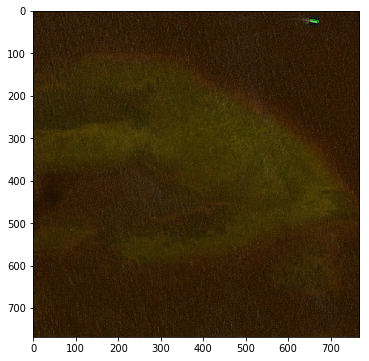

In [66]:
imshow(im, msk[1:2,:,:])

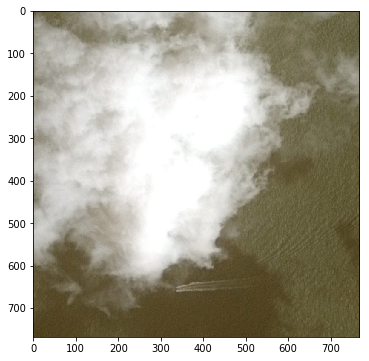

In [54]:
imshow(im, msk[:1,:,:] - msk[1:2,:,:])

In [125]:
markers = cv2.watershed(image,markers)

In [ ]:
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# # Finding unknown region
# sure_fg = np.uint8(sure_fg)

In [37]:
s2 = pd.read_csv('submission0.910.csv')

In [38]:
masks2 = s2[~s2.EncodedPixels.isna()]